Data Mining Project 

# **Creditcard Fraud Detection**

(code with thorough description)

The following is segments of codes seperated by each steps and explained side by side by description.

In this project, we are going to use the creditcard history dataset from the kaggle website. We are going to perform logistic regression and neural network technique to our dataset and train our both models to become capable to betterly predict that a given transection is a defaulter transection or normal transection.

then, we will compare the accuracy of both the models and select the one which gives the best prediction/accuracy.

importing all the libraries which we are going to use in our project.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

we have uploaded the detaset csv file named as creditcard.csv. this file has to be reuploaded again as soon as we reopen the code everytime.

In [ ]:
dataframe=pd.read_csv("/creditcard.csv")


In [ ]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataframe.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


let's see and learn about what type of dataset we have with us

In [ ]:
dataframe.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

here we come to know that our dataset is not having any null values which need to be filled

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

the dataset we have consists of 31 colomns and the last column is the class column consisting of only 0 or 1 ( 0 for not defaulter and 1 for defaulter)

now checking the distribution of our dataset whether it is balanced or imbalanced??

In [ ]:
dataframe['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

As we can see, the dataset is highly imbalanced, 

we have a total non defaulters records = 284315

and total defaulters records are only = 492

Now, seperating the data into two frames

one with all defaulters record and other with non-defaulters

In [ ]:
non_default = dataframe[dataframe.Class == 0]
default = dataframe[dataframe.Class == 1]
print(non_default.shape)
print(default.shape)

(284315, 31)
(492, 31)


In [ ]:
dataframe.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


As the dataset is **highly unbalanced**, so we have to make the number of records same for both the classes

the defaulter class has only 492 records, so we have to reduce the non defaulters class dataset to 492 by randomly taking a sample.

In [ ]:
non_default_sample = non_default.sample(n=492)

Now combining both the datasets of same number, to get a total of 492+492=984 rows

In [ ]:
updated_dataframe = pd.concat([non_default_sample, default], axis=0)

In [ ]:
updated_dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
175834,122509.0,-3.134115,1.773853,-0.956038,-0.164130,-1.468073,-0.354077,0.166048,1.387905,0.707092,...,-0.504374,-0.718766,0.140316,-0.087286,0.278648,0.137992,0.315299,-0.166412,140.68,0
170259,120098.0,2.189744,-0.040923,-2.552505,-0.581073,0.989879,-0.943905,0.686202,-0.489596,0.031569,...,0.063655,0.255234,-0.046949,0.097572,0.281713,1.430910,-0.179926,-0.093146,18.00,0
174385,121889.0,-0.196211,1.257271,-0.826657,-0.521276,0.612863,-0.819198,0.635041,0.328375,-0.190882,...,-0.303431,-0.877546,0.159088,0.467211,-0.383023,0.121717,0.092956,0.021299,12.27,0
21515,31718.0,1.221811,-0.622699,0.271691,-0.507132,-1.093817,-1.303639,-0.166317,-0.390254,-1.080318,...,0.302138,0.641491,-0.168266,0.791311,0.586821,-0.150528,-0.016895,0.032471,105.55,0
16440,27805.0,-0.626936,0.586511,2.208333,0.651095,-0.557420,-0.064765,0.299219,-0.042888,-0.049737,...,0.123302,0.587396,-0.326288,0.509967,0.433896,0.631174,-0.100953,-0.019992,59.90,0


In [ ]:
updated_dataframe.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


that's how pretty much the dataset will look like.

describing our new dataset

In [ ]:
updated_dataframe['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

both the classes have equal number of records present in the dataset, so the dataset is now **purely balanced**.

In [ ]:
updated_dataframe.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94464.900407,0.034647,0.017566,0.059542,0.048980,0.069358,-0.002371,0.042465,-0.039816,0.049550,...,-0.010038,0.024299,-0.000538,0.007048,0.023336,-0.004698,0.038854,0.013634,-0.019888,85.876220
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


As we notice the mean of both the class records, their is a lot of difference ammong both, which would definitely help us in building our model

Now, splitting the data into features and targets.

In [ ]:
X = updated_dataframe.drop(columns='Class', axis=1)
Y = updated_dataframe['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
175834  122509.0 -3.134115  1.773853 -0.956038 -0.164130 -1.468073 -0.354077   
170259  120098.0  2.189744 -0.040923 -2.552505 -0.581073  0.989879 -0.943905   
174385  121889.0 -0.196211  1.257271 -0.826657 -0.521276  0.612863 -0.819198   
21515    31718.0  1.221811 -0.622699  0.271691 -0.507132 -1.093817 -1.303639   
16440    27805.0 -0.626936  0.586511  2.208333  0.651095 -0.557420 -0.064765   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

175834    0
170259    0
174385    0
21515     0
16440     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


the X contains all the features

and Y contains the corresponding targets.

now we are going to build two prediction models:

1- logistic regression 

2- Neural Networks 

## **1- Logistic Regression**

dividing our dataset into two parts i-e training part and testing part

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

we have took the training part to be 80% and the testing part limits only to 20% as being proved by the following segment's output

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (787,) (197,)


now training the model for our logistic regression

In [ ]:
m1 = LogisticRegression()

training this model with our specified training data i-e X_train and Y_train

In [ ]:
m1.fit(X_train, Y_train)

LogisticRegression()

now checking for the accuracy of our created model on both the training and testing dataset

1-training set accuracy

In [ ]:
training_of_x_prediction = m1.predict(X_train)
accuracy_on_training_data = accuracy_score(training_of_x_prediction, Y_train)

In [ ]:
print("the accuracy on the trainset is : ")
print(accuracy_on_training_data)

the accuracy on the trainset is : 
0.9491740787801779



so this model is neither underfit not overfit.

2-test set accuracy

In [ ]:
testing_of_x_prediction = m1.predict(X_test)
accuracy_on_testing_data = accuracy_score(testing_of_x_prediction, Y_test)

In [ ]:
print("the accuracy on the testset is : ")
print(accuracy_on_testing_data)

the accuracy on the testset is : 
0.9238578680203046


so, the accuracy we are getting is around somewhat more than **92%** on the testset and around **94%** on the training set 

this means that fortunately our model is not underfit either is it overfit.

as the model m1 is complete using the logistic regression technique giving a handsome accuracy on both training and testing dataset.


now, goiing towards our second model i-e neural networks. 

##**2- Neural Networks**

now, we try another model based on the technique of neural networks to check if this model could solve our problem in a better way or not.

we can also use both models together in the ensemble learning and improve the total accuracy.


first, we need to normalize our dataset.

In [ ]:
#normalization
scalar = StandardScaler()
x=X
X=scalar.fit_transform(x)
X

array([[ 7.27245478e-01, -1.38795507e-01, -1.26421593e-02, ...,
         2.20232105e-01, -4.38200960e-01,  1.51718490e-01],
       [ 6.77009638e-01,  8.26536958e-01, -5.02675117e-01, ...,
        -2.68419525e-01, -2.72966645e-01, -3.56325719e-01],
       [ 7.14327095e-01,  3.93910976e-01, -1.52131774e-01, ...,
         8.40597992e-04, -1.48636158e-02, -3.80054878e-01],
       ...,
       [ 1.70325011e+00,  3.06888866e-01, -1.87479216e-01, ...,
         2.89113550e-01,  3.75437493e-01, -1.08308376e-01],
       [ 1.71606432e+00, -1.35117663e-01, -3.33427628e-01, ...,
         7.82247643e-01, -6.35057657e-01,  5.83729997e-01],
       [ 1.72402371e+00,  7.90677383e-01, -4.48832667e-01, ...,
        -8.79339991e-02, -9.74232019e-02, -2.54741724e-01]])

splitting the dataset into three parts for training, test and validation detasets.

In [ ]:
#spliting the training and test & validation set
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

#now spliting the test and validation set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(688, 30) (148, 30) (148, 30) (688,) (148,) (148,)


preprocessing steps completed

##our architecture
first layer 1:30 neurons

Hidden layer 1: 64 neurons, ReLU activation

Hidden layer 2: 64 neurons, ReLU activation

Output Layer: 1 neuron, Sigmoid activation

In [ ]:
m2 = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [ ]:
m2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

now, we are in a position to train our model on our dataset

In [ ]:
history = m2.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
11/11 [==============================] - 1s 20ms/step - loss: 0.6773 - accuracy: 0.5320 - val_loss: 0.6707 - val_accuracy: 0.5676
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 0.6242 - accuracy: 0.6424 - val_loss: 0.6311 - val_accuracy: 0.6486
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 0.5842 - accuracy: 0.7195 - val_loss: 0.5994 - val_accuracy: 0.7432
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 0.5519 - accuracy: 0.7660 - val_loss: 0.5727 - val_accuracy: 0.7838
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: 0.5247 - accuracy: 0.8096 - val_loss: 0.5495 - val_accuracy: 0.8176
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5013 - accuracy: 0.8328 - val_loss: 0.5294 - val_accuracy: 0.8378
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 0.4809 - accuracy: 0.8576 - val_loss: 0.5113 - val_accuracy: 0.8581
Epoch 8/20
11/11 [=

the accuracy on the train set exceeds **91%**

as we see, the model kept training and the accuracy kept increasing

the model kept on training and the loss kept decreasing as also shown in the graph.

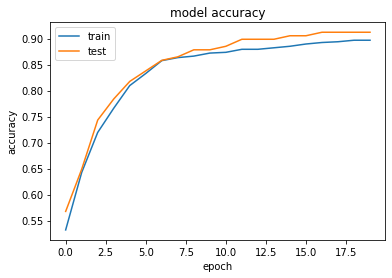

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

the upper graph shows the accuracy on the trianing and testing set

as we see, the model kept training and the accuracy kept increasing

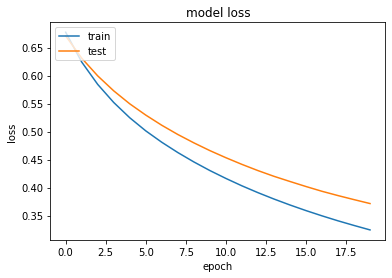

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

the upper graph shows the model loss on the trianing and testing set

the model kept on training and the loss kept decreasing as also shown in the graph.

In [ ]:
m2.evaluate(X_test, Y_test)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.9324


0.9324324131011963

the accuracy on the test set came to be around **93%** which seems to be good but not as much as our first logistic regression model

the steps for our model m2 i-e neural networks is also completed

#both the models are giving accuracy of more than **90%** but the model m1 i-e logistic regression model wins after a very close match 